<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Pie Charts**


Estimated time needed: **30** minutes


- In this lab, you will focus on visualizing data.

- The provided dataset will be loaded into pandas for analysis.

- Various pie charts will be created to:
   - Analyze developer preferences.
  
   - Identify technology usage trends.
    
- The lab aims to provide insights into key variables using visual representations.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data.

-   Visualize the relationship between two features.

-   Visualize composition of data.

-   Visualize comparison of data.


## Setup: Downloading and Loading the Data
**Install the libraries**


In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

**Download and Load the Data**


To start, download and load the dataset into a `pandas` DataFrame.



In [22]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-08-24 07:39:21--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  64.2MB/s    in 2.4s    

2025-08-24 07:39:24 (64.2 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Composition with Pie Charts


##### 1.1 Create a Pie Chart of the Top 5 Databases Respondents Want to Work With


In the survey data, the `DatabaseWantToWorkWith` column lists the databases that respondents wish to work with. Let’s visualize the top 5 most-desired databases in a pie chart.



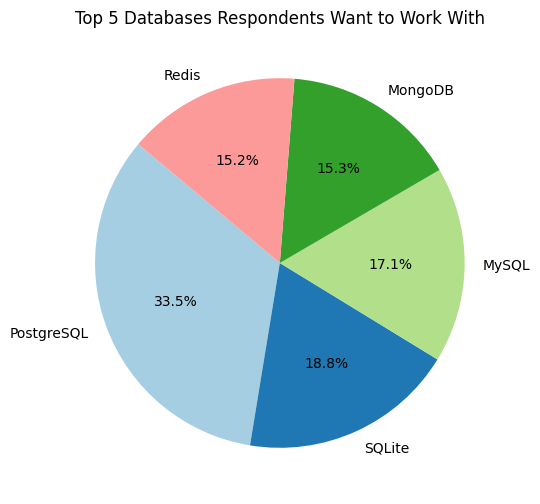

In [4]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Load relevant column
df = pd.read_sql_query("""
SELECT DatabaseWantToWorkWith
FROM main
WHERE DatabaseWantToWorkWith IS NOT NULL
""", conn)

conn.close()

# Split semicolon-separated values into rows
df_exploded = df.assign(Database=df["DatabaseWantToWorkWith"].str.split(";")).explode("Database")
df_exploded["Database"] = df_exploded["Database"].str.strip()

# Count frequencies
db_counts = df_exploded["Database"].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    db_counts,
    labels=db_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Databases Respondents Want to Work With")
plt.show()


The `DevType` column lists the developer types for respondents. We’ll examine the distribution by showing the top 5 developer roles in a pie chart.



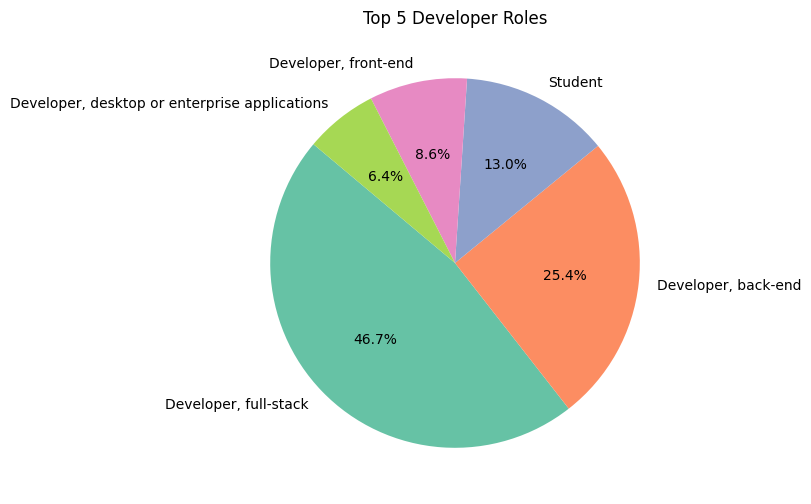

In [5]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to DB
conn = sqlite3.connect("survey-results-public.sqlite")

# Load DevType column
df = pd.read_sql_query("""
SELECT DevType
FROM main
WHERE DevType IS NOT NULL
""", conn)

conn.close()

# Split semicolon-separated values into rows
df_exploded = df.assign(Role=df["DevType"].str.split(";")).explode("Role")
df_exploded["Role"] = df_exploded["Role"].str.strip()

# Count top 5 roles
role_counts = df_exploded["Role"].value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    role_counts,
    labels=role_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set2.colors
)
plt.title("Top 5 Developer Roles")
plt.show()


##### 1.3 Create a pie chart for the operating systems used by respondents for professional use


The `OpSysProfessional` use column shows the operating systems developers use professionally. Let’s visualize the distribution of the top operating systems in a pie chart.



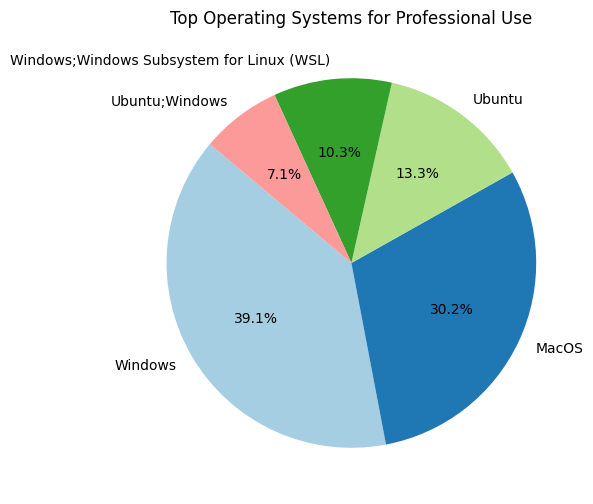

In [6]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load OpSysProfessional use column
df = pd.read_sql_query("""
SELECT [OpSysProfessional use]
FROM main
WHERE [OpSysProfessional use] IS NOT NULL
""", conn)

conn.close()

# Clean values (remove extra spaces)
df["OpSysProfessional use"] = df["OpSysProfessional use"].str.strip()

# Count occurrences
os_counts = df["OpSysProfessional use"].value_counts().nlargest(5)  # Top 5

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    os_counts,
    labels=os_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top Operating Systems for Professional Use")
plt.show()


### Task 2: Additional Visualizations and Comparisons


##### 2.1 Pie Chart for Top 5 Programming Languages Respondents Have Worked With


The `LanguageHaveWorkedWith` column contains the programming languages that respondents have experience with. We’ll plot a pie chart to display the composition of the top 5 languages.



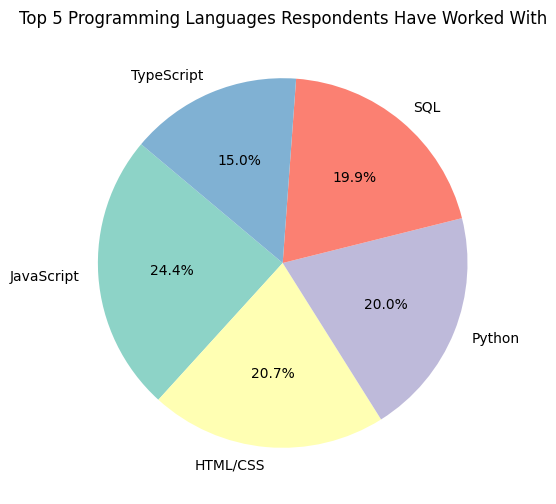

In [7]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load LanguageHaveWorkedWith column
df = pd.read_sql_query("""
SELECT LanguageHaveWorkedWith
FROM main
WHERE LanguageHaveWorkedWith IS NOT NULL
""", conn)

conn.close()

# Split multiple languages per respondent (separated by ;)
all_langs = df["LanguageHaveWorkedWith"].str.split(";").explode().str.strip()

# Count top 5 languages
lang_counts = all_langs.value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    lang_counts,
    labels=lang_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Programming Languages Respondents Have Worked With")
plt.show()


##### 2.2 Pie Chart for Top Collaboration Tools used in Professional Use


Using the `NEWCollabToolsHaveWorkedWith` column, we’ll identify and visualize the top collaboration tools respondents use in their professional work.



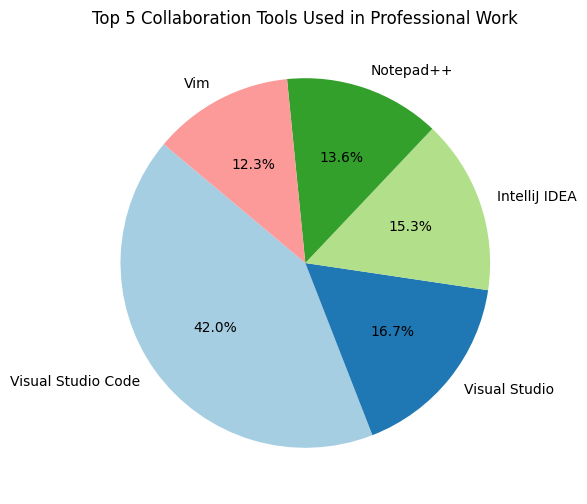

In [8]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load collaboration tools column
df = pd.read_sql_query("""
SELECT NEWCollabToolsHaveWorkedWith
FROM main
WHERE NEWCollabToolsHaveWorkedWith IS NOT NULL
""", conn)

conn.close()

# Split multiple tools per respondent (separated by ;)
all_tools = df["NEWCollabToolsHaveWorkedWith"].str.split(";").explode().str.strip()

# Count top 5 tools
tool_counts = all_tools.value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    tool_counts,
    labels=tool_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Paired.colors
)
plt.title("Top 5 Collaboration Tools Used in Professional Work")
plt.show()


### Task 3: Analyzing and Interpreting Composition


In this task, you will create additional pie charts to analyze specific aspects of the survey data. Use `pandas` and `matplotlib` to complete each task and interpret the findings.



##### 3.1 Pie Chart of `Respondents` Most Admired Programming Languages


The `LanguageAdmired` column lists the programming languages respondents admire most. Create a pie chart to visualize the top 5 admired languages.



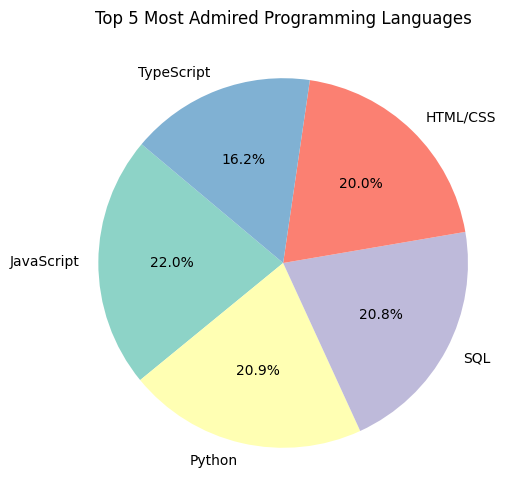

In [9]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to the SQLite database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load admired languages column
df = pd.read_sql_query("""
SELECT LanguageAdmired
FROM main
WHERE LanguageAdmired IS NOT NULL
""", conn)

conn.close()

# Split multiple admired languages per respondent (separated by ;)
all_langs = df["LanguageAdmired"].str.split(";").explode().str.strip()

# Count top 5 admired languages
lang_counts = all_langs.value_counts().nlargest(5)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    lang_counts,
    labels=lang_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title("Top 5 Most Admired Programming Languages")
plt.show()


##### 3.2 Pie Chart of Tools Used for AI Development


Using the `AIToolCurrently` Using column, create a pie chart to visualize the top 5 tools developers are currently using for AI development.



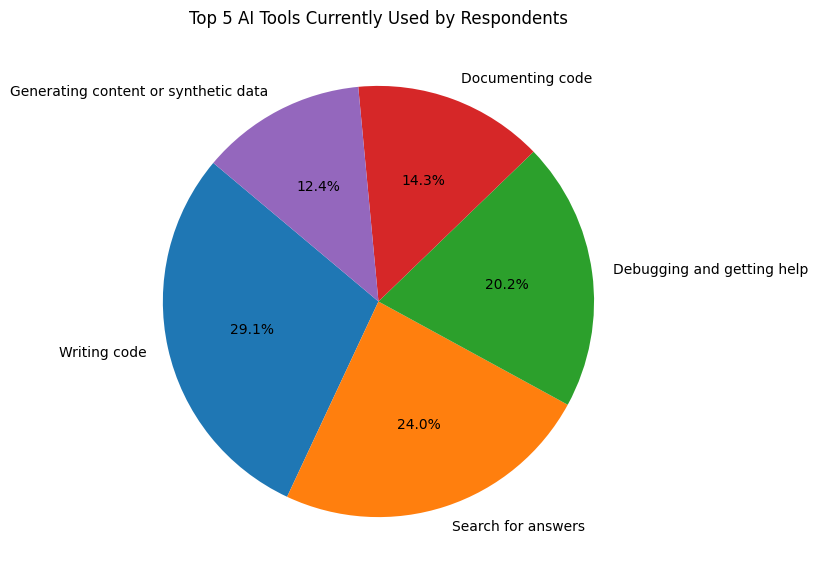

In [32]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to your database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load only the AI Tools column (note the space in the column name, use quotes)
query = 'SELECT [AIToolCurrently Using] FROM main WHERE [AIToolCurrently Using] IS NOT NULL'
df = pd.read_sql(query, conn)
conn.close()

# Split multiple tools (they are usually separated by ;)
tools_series = df["AIToolCurrently Using"].str.split(";")

# Flatten into one list
all_tools = [tool.strip() for sublist in tools_series.dropna() for tool in sublist]

# Count frequencies
tool_counts = pd.Series(all_tools).value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(7,7))
plt.pie(tool_counts, labels=tool_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 AI Tools Currently Used by Respondents")
plt.show()




##### 3.3 Pie Chart for Preferred Web Frameworks


The `WebframeWantToWorkWith` column includes web frameworks that respondents are interested in working with. Visualize the top 5 frameworks in a pie chart.



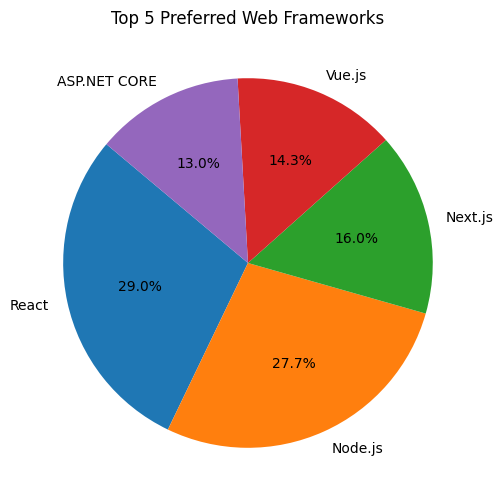

In [33]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load the column into pandas
df = pd.read_sql('SELECT [WebframeWantToWorkWith] FROM main', conn)

# Drop NaN values
df = df.dropna()

# Split multiple frameworks (comma separated), flatten into single list
frameworks = df['WebframeWantToWorkWith'].str.split(';').explode().str.strip()

# Count frequency
framework_counts = frameworks.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(framework_counts, labels=framework_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Preferred Web Frameworks")
plt.show()


##### 3.4 Pie Chart for Most Desired Embedded Technologies


Using the `EmbeddedWantToWorkWith` column, create a pie chart to show the top 5 most desired embedded technologies that respondents wish to work with.



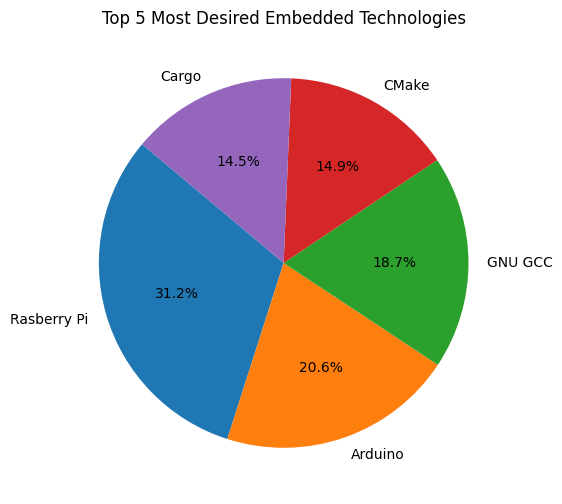

In [34]:
##Write your code here
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("survey-results-public.sqlite")

# Load EmbeddedWantToWorkWith column
df = pd.read_sql('SELECT [EmbeddedWantToWorkWith] FROM main', conn)

# Drop NaN values
df = df.dropna()

# Split multiple embedded techs (semicolon-separated), flatten into single list
embedded_techs = df['EmbeddedWantToWorkWith'].str.split(';').explode().str.strip()

# Count frequency and take top 5
embedded_counts = embedded_techs.value_counts().head(5)

# Plot pie chart
plt.figure(figsize=(6,6))
plt.pie(embedded_counts, labels=embedded_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 5 Most Desired Embedded Technologies")
plt.show()


### Summary


After completing this lab, you will be able to:
- Create pie charts to visualize developer preferences across databases, programming languages, AI tools, and cloud platforms.
- Identify trends in technology usage, role distribution, and tool adoption through pie charts.
- Analyze and compare data composition across various categories to gain insights into developer preferences.




## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
